In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 8.7 MB/s eta 0:00:00


In [ ]:
from spotipy import Spotify as sp
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2
from functools import reduce
import os
import random
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import spotipy.util as util


In [ ]:
# spotify api credentials
cid = '***'
secret = '***'
redirect_uri='http://localhost:8000/callback'
username = 'cankurttekin'

In [ ]:
# authorisation
scope = 'user-top-read playlist-modify-public playlist-modify-private'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
    print("connected")
else:
    print("no token for: ", username)

KeyboardInterrupt: ignored

In [ ]:
# fav songs with time
results = sp.current_user_top_tracks(limit=50, offset=0,time_range='short_term')
results

{'items': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4ksCwAPgMi8rkQwwR3nMos'},
      'href': 'https://api.spotify.com/v1/artists/4ksCwAPgMi8rkQwwR3nMos',
      'id': '4ksCwAPgMi8rkQwwR3nMos',
      'name': 'Noir Désir',
      'type': 'artist',
      'uri': 'spotify:artist:4ksCwAPgMi8rkQwwR3nMos'}],
    'available_markets': ['AE',
     'AT',
     'AU',
     'BE',
     'BG',
     'BR',
     'CA',
     'CH',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'EE',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'HK',
     'HU',
     'ID',
     'IE',
     'IL',
     'IS',
     'IT',
     'LT',
     'LU',
     'LV',
     'MX',
     'MY',
     'NO',
     'NZ',
     'PH',
     'PL',
     'PT',
     'RO',
     'SA',
     'SE',
     'SG',
     'SK',
     'TN',
     'TR',
     'TW',
     'US',
     'ZA'],
    'external_urls': {'spotify': 'https://open.spotify.com/album/4vvtMZGxbWEHyOv7MNgrsT'},

In [ ]:
######################################################################

# func to get over api's 100 songs limit
def more_than_hundred_songs(username, playlist_id, fields = None):
    response = sp.user_playlist_tracks(username, playlist_id, fields = fields, limit = 100)
    results = response["items"]
    while(len(results) < response["total"]):
        response = sp.user_playlist_tracks(username, playlist_id, fields = fields, limit=100, offset=len(results))
        results.extend(response["items"])
    return results

#x["tracks"]["items"]

In [ ]:
def analyze_playlist(creator, playlist_id):

    # Create empty dataframe
    playlist_features_list = ["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]
    #["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]

    playlist_df = pd.DataFrame(columns = playlist_features_list)

    # Loop through every track in the playlist, extract features and append the features to the playlist df
    ##["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]

        playlist_features["track_id"]

        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]

        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    return playlist_df


In [ ]:
analyze_playlist('**','***')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,acousticness,album,artist,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,track_id,track_name,valence
0,NaN,Nothings Perfect,Mark Kelly,NaN,NaN,0.3080,NaN,0,2,0.1450,-8.703,0,0.0339,161.483,3dyjALPqrvKXGQzqIxViFs,Under The Jasmine,0.6380
1,NaN,Uomo Donna,Andrea Laszlo De Simone,NaN,NaN,0.5160,NaN,0.422,10,0.8670,-9.429,0,0.0481,140.205,0NCpmV4pGSFtTZLul3QUbj,Sogno l'amore,0.1300
2,NaN,Greek Composers - Yiorgos Zambetas,Yiorgos Zambetas,NaN,NaN,0.6090,NaN,0.00248,9,0.1180,-13.699,0,0.0446,69.496,33ltS0rtkqfMjUWcWg9yy2,Mia Istoria,0.5310
3,NaN,California Airport Love,Amason,NaN,NaN,0.4090,NaN,0.00323,9,0.1010,-9.226,0,0.0299,109.978,41uHv2ZIT0YDUHoyNzvRQ1,California Dreamin',0.3380
4,NaN,Little Drop Of Poison,Rebekka Bakken,NaN,NaN,0.3270,NaN,4.25e-05,9,0.1150,-11.122,0,0.0572,114.990,105zKOcevVlvQmZPSZX1jv,Little Drop Of Poison,0.5510
5,NaN,Let's Part in Style,Michelle Gurevich,NaN,NaN,0.2710,NaN,0.894,4,0.0946,-15.577,0,0.2670,124.009,4rw8KX7KuZDdeMH4O1ey9s,Blue Eyes Unchanged,0.2850
6,NaN,Chansons,Jill Barber,NaN,NaN,0.2140,NaN,0.000164,9,0.0945,-9.634,0,0.0329,114.990,0oMp06EjwhYFvDB33VCiW3,Petite fleur,0.4470
7,NaN,Marlene,Aino Venna,NaN,NaN,0.2570,NaN,0.00417,10,0.1010,-12.679,0,0.0353,170.530,02q3kEgng0D3vL2Y8ONVRw,Waltz to Paris,0.4440
8,NaN,Cavalo,Rodrigo Amarante,NaN,NaN,0.1170,NaN,0.648,6,0.1040,-16.669,0,0.0521,175.574,7IaWt6uVIfpiqdMwq8iEL1,Irene,0.3090
9,NaN,West of Memphis: Voices For Justice,Various Artists,NaN,NaN,0.2610,NaN,0.000223,9,0.1160,-11.734,0,0.0282,137.683,3rGmuSfsTTl0nNFpk2N595,House Of Pain,0.2270


In [ ]:
def analyze_playlist_dict(playlist_dict):

    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        #playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)

    return playlist_dict_df


In [ ]:
playlist_dict = {
****
}


In [ ]:
multiple_playlist_df = analyze_playlist_dict(playlist_dict)
multiple_playlist_df#["playlist"].value_counts()


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,acousticness,album,artist,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,track_id,track_name,valence
0,NaN,SASAMI,SASAMI,NaN,NaN,0.2400,NaN,0.00482,11,0.1230,-15.149,1,0.0304,86.982,0UC7mR34BwAZKZ5hvDBCKK,I Was A Window,0.3200
1,NaN,sex money feelings die (slowed version),Lykke Li,NaN,NaN,0.4400,NaN,1.57e-06,5,0.0849,-6.587,0,0.0594,111.014,0dkvbYmXYEPK7gGMdytmfI,sex money feelings die - slowed version,0.4360
2,NaN,I Wanna Dance With Somebody (Who Loves Me),illuminati hotties,NaN,NaN,0.2530,NaN,0.899,7,0.0964,-13.504,0,0.0260,97.877,10e8OyV77FnTWvWhO1x6n6,I Wanna Dance With Somebody (Who Loves Me),0.0755
3,NaN,Her,Her,NaN,NaN,0.5950,NaN,0.025,8,0.4450,-4.781,0,0.0800,140.129,1y5FGDQHfDOSIRye0jkoBt,On & On,0.3090
4,NaN,Amir,Tamino,NaN,NaN,0.4700,NaN,0.00425,2,0.0919,-9.153,1,0.0329,98.957,3McYbdoWDLg4UynlqfAugA,Tummy,0.3640
5,NaN,We Fucked A Flame Into Being,Warhaus,NaN,NaN,0.5100,NaN,0.0895,1,0.6450,-10.780,0,0.0316,89.937,2MdfkgXieOUdXNM8qUpURm,I'm Not Him,0.4040
6,NaN,SYML,SYML,NaN,NaN,0.3580,NaN,0.0186,0,0.1130,-10.018,0,0.0253,103.940,2NeM9rfWo70KQej9GxeaoL,Where's My Love,0.3650
7,NaN,Ison,Sevdaliza,NaN,NaN,0.1680,NaN,0.0281,10,0.2580,-11.773,1,0.0664,97.793,4LIIWJjlXMftVKMQWUrxKO,Human,0.1630
8,NaN,How Low Can You Go,LP,NaN,NaN,0.8060,NaN,0.0503,9,0.2980,-5.924,0,0.2570,118.143,1Ne6Nm4aUUd5mILzhgOVwu,How Low Can You Go,0.4680
9,NaN,so sad so sexy,Lykke Li,NaN,NaN,0.4040,NaN,4.44e-06,11,0.0963,-5.750,0,0.0376,133.479,1hQjRldnVW3On7QzoxGlht,so sad so sexy,0.1340


In [ ]:
multiple_playlist_df

In [ ]:
#Create a dataframe of your playlist including tracks' names and audio features
import pandas as pd

sourcePlaylistID = '***'
sourcePlaylist = sp.user_playlist('***', sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)

playlist_df = pd.DataFrame(features, index = track_names)


In [ ]:
x = sp.user_playlist('***', '***')
xtracks = x["tracks"];
y = sp.playlist('***', fields="tracks,next")
ytracks = y["tracks"]

In [ ]:


sourcePlaylist = sp.playlist('***', fields="tracks,next")
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

while tracks['next']:
    sourcePlaylist = sp.next(tracks)

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)

playlist_df = pd.DataFrame(features, index = track_names)






KeyboardInterrupt: 

In [ ]:
def user_playlist_tracks_full(spotify_connection, user='***', playlist_id='***', fields=None, market=None):
    """ Get full details of the tracks of a playlist owned by a user.
        https://developer.spotify.com/documentation/web-api/reference/playlists/get-playlists-tracks/

        Parameters:
            - user - the id of the user
            - playlist_id - the id of the playlist
            - fields - which fields to return
            - market - an ISO 3166-1 alpha-2 country code.
    """

    # first run through also retrieves total no of songs in library
    response = spotify_connection.user_playlist_tracks(user, playlist_id, fields=fields, limit=100, market=market)
    results = response["items"]

    # subsequently runs until it hits the user-defined limit or has read all songs in the library
    while len(results) < response["total"]:
        response = spotify_connection.user_playlist_tracks(
            user, playlist_id, fields=fields, limit=100, offset=len(results), market=market
        )
        results.extend(response["items"])

    return results


#x["tracks"]["items"]


In [ ]:
#Create a dataframe of your playlist including tracks' names and audio features

songs = user_playlist_tracks_full(sp)

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)

playlist_df = pd.DataFrame(features, index = track_names)


In [ ]:
multiple_playlist_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,SASAMI,SASAMI,I Was A Window,0UC7mR34BwAZKZ5hvDBCKK,0.643,0.2400,11,-15.149,1,0.0304,0.00482,0.1230,0.3200,86.982,214107,4
1,Lykke Li,sex money feelings die (slowed version),sex money feelings die - slowed version,0dkvbYmXYEPK7gGMdytmfI,0.797,0.4400,5,-6.587,0,0.0594,1.57e-06,0.0849,0.4360,111.014,168811,4
2,illuminati hotties,I Wanna Dance With Somebody (Who Loves Me),I Wanna Dance With Somebody (Who Loves Me),10e8OyV77FnTWvWhO1x6n6,0.657,0.2530,7,-13.504,0,0.0260,0.899,0.0964,0.0755,97.877,211403,4
3,Her,Her,On & On,1y5FGDQHfDOSIRye0jkoBt,0.628,0.5950,8,-4.781,0,0.0800,0.025,0.4450,0.3090,140.129,218107,4
4,Tamino,Amir,Tummy,3McYbdoWDLg4UynlqfAugA,0.651,0.4700,2,-9.153,1,0.0329,0.00425,0.0919,0.3640,98.957,190147,4
5,Warhaus,We Fucked A Flame Into Being,I'm Not Him,2MdfkgXieOUdXNM8qUpURm,0.619,0.5100,1,-10.780,0,0.0316,0.0895,0.6450,0.4040,89.937,253347,4
6,SYML,SYML,Where's My Love,2NeM9rfWo70KQej9GxeaoL,0.608,0.3580,0,-10.018,0,0.0253,0.0186,0.1130,0.3650,103.940,202010,4
7,Sevdaliza,Ison,Human,4LIIWJjlXMftVKMQWUrxKO,0.540,0.1680,10,-11.773,1,0.0664,0.0281,0.2580,0.1630,97.793,192042,4
8,LP,How Low Can You Go,How Low Can You Go,1Ne6Nm4aUUd5mILzhgOVwu,0.436,0.8060,9,-5.924,0,0.2570,0.0503,0.2980,0.4680,118.143,203520,4
9,Lykke Li,so sad so sexy,so sad so sexy,1hQjRldnVW3On7QzoxGlht,0.507,0.4040,11,-5.750,0,0.0376,4.44e-06,0.0963,0.1340,133.479,212427,4


In [ ]:
playlist_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
Under The Jasmine,0.7610,https://api.spotify.com/v1/audio-analysis/3dyj...,0.523,268813,0.3080,3dyjALPqrvKXGQzqIxViFs,0.000000,2,0.1450,-8.703,0,0.0339,161.483,3,https://api.spotify.com/v1/tracks/3dyjALPqrvKX...,audio_features,spotify:track:3dyjALPqrvKXGQzqIxViFs,0.6380
Sogno l'amore,0.7500,https://api.spotify.com/v1/audio-analysis/0NCp...,0.350,525926,0.5160,0NCpmV4pGSFtTZLul3QUbj,0.422000,10,0.8670,-9.429,0,0.0481,140.205,4,https://api.spotify.com/v1/tracks/0NCpmV4pGSFt...,audio_features,spotify:track:0NCpmV4pGSFtTZLul3QUbj,0.1300
Mia Istoria,0.5950,https://api.spotify.com/v1/audio-analysis/33lt...,0.291,199773,0.6090,33ltS0rtkqfMjUWcWg9yy2,0.002480,9,0.1180,-13.699,0,0.0446,69.496,4,https://api.spotify.com/v1/tracks/33ltS0rtkqfM...,audio_features,spotify:track:33ltS0rtkqfMjUWcWg9yy2,0.5310
California Dreamin',0.7640,https://api.spotify.com/v1/audio-analysis/41uH...,0.772,188346,0.4090,41uHv2ZIT0YDUHoyNzvRQ1,0.003230,9,0.1010,-9.226,0,0.0299,109.978,4,https://api.spotify.com/v1/tracks/41uHv2ZIT0YD...,audio_features,spotify:track:41uHv2ZIT0YDUHoyNzvRQ1,0.3380
Little Drop Of Poison,0.6420,https://api.spotify.com/v1/audio-analysis/105z...,0.611,188155,0.3270,105zKOcevVlvQmZPSZX1jv,0.000043,9,0.1150,-11.122,0,0.0572,114.990,4,https://api.spotify.com/v1/tracks/105zKOcevVlv...,audio_features,spotify:track:105zKOcevVlvQmZPSZX1jv,0.5510
Blue Eyes Unchanged,0.3060,https://api.spotify.com/v1/audio-analysis/4rw8...,0.794,306794,0.2710,4rw8KX7KuZDdeMH4O1ey9s,0.894000,4,0.0946,-15.577,0,0.2670,124.009,4,https://api.spotify.com/v1/tracks/4rw8KX7KuZDd...,audio_features,spotify:track:4rw8KX7KuZDdeMH4O1ey9s,0.2850
Petite fleur,0.8600,https://api.spotify.com/v1/audio-analysis/0oMp...,0.616,163187,0.2140,0oMp06EjwhYFvDB33VCiW3,0.000164,9,0.0945,-9.634,0,0.0329,114.990,4,https://api.spotify.com/v1/tracks/0oMp06EjwhYF...,audio_features,spotify:track:0oMp06EjwhYFvDB33VCiW3,0.4470
Waltz to Paris,0.8170,https://api.spotify.com/v1/audio-analysis/02q3...,0.396,219827,0.2570,02q3kEgng0D3vL2Y8ONVRw,0.004170,10,0.1010,-12.679,0,0.0353,170.530,3,https://api.spotify.com/v1/tracks/02q3kEgng0D3...,audio_features,spotify:track:02q3kEgng0D3vL2Y8ONVRw,0.4440
Irene,0.9760,https://api.spotify.com/v1/audio-analysis/7IaW...,0.549,197920,0.1170,7IaWt6uVIfpiqdMwq8iEL1,0.648000,6,0.1040,-16.669,0,0.0521,175.574,3,https://api.spotify.com/v1/tracks/7IaWt6uVIfpi...,audio_features,spotify:track:7IaWt6uVIfpiqdMwq8iEL1,0.3090
House Of Pain,0.7530,https://api.spotify.com/v1/audio-analysis/3rGm...,0.385,270427,0.2610,3rGmuSfsTTl0nNFpk2N595,0.000223,9,0.1160,-11.734,0,0.0282,137.683,4,https://api.spotify.com/v1/tracks/3rGmuSfsTTl0...,audio_features,spotify:track:3rGmuSfsTTl0nNFpk2N595,0.2270


In [ ]:
playlist_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]


In [ ]:
len(playlist_df)

57

In [ ]:
import random
numbers = []
for dd in range(len(playlist_df)):
    numbers.append(random.randint(3,10))

numbers[49]=10
numbers[66]=10
numbers[65]=10
numbers[6]=10
len(numbers),numbers.count(10)


(238, 38)

In [ ]:
#playlist_df
#playlist_df['ratings']= numbers


playlist_df['ratings'] = [4, 2, 1, 5, 6, 1, 3,
                          4, 4, 2, 3, 2, 4, 4, 2, 3, 3,
                          2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
                          3, 4, 5, 5, 5, 6, 3, 3, 4, 8,
                          6, 9, 10, 10, 10, 9, 8, 7, 7, 6,
                          9, 6, 9, 10, 9, 9, 8, 7, 10, 10]
# test
playlist_df.head()



#numbers
#for i in range(len(playlist_df)):
#    playlist_df[i]['ratings']=random.randint(0,10)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
Under The Jasmine,3dyjALPqrvKXGQzqIxViFs,0.761,0.523,268813,0.308,0.000000,2,0.145,-8.703,0,0.0339,161.483,0.638,4
Sogno l'amore,0NCpmV4pGSFtTZLul3QUbj,0.750,0.350,525926,0.516,0.422000,10,0.867,-9.429,0,0.0481,140.205,0.130,2
Mia Istoria,33ltS0rtkqfMjUWcWg9yy2,0.595,0.291,199773,0.609,0.002480,9,0.118,-13.699,0,0.0446,69.496,0.531,1
California Dreamin',41uHv2ZIT0YDUHoyNzvRQ1,0.764,0.772,188346,0.409,0.003230,9,0.101,-9.226,0,0.0299,109.978,0.338,5
Little Drop Of Poison,105zKOcevVlvQmZPSZX1jv,0.642,0.611,188155,0.327,0.000043,9,0.115,-11.122,0,0.0572,114.990,0.551,6


In [ ]:
X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']


In [ ]:
playlist_df

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
Under The Jasmine,3dyjALPqrvKXGQzqIxViFs,0.7610,0.523,268813,0.3080,0.000000,2,0.1450,-8.703,0,0.0339,161.483,0.6380,4
Sogno l'amore,0NCpmV4pGSFtTZLul3QUbj,0.7500,0.350,525926,0.5160,0.422000,10,0.8670,-9.429,0,0.0481,140.205,0.1300,2
Mia Istoria,33ltS0rtkqfMjUWcWg9yy2,0.5950,0.291,199773,0.6090,0.002480,9,0.1180,-13.699,0,0.0446,69.496,0.5310,1
California Dreamin',41uHv2ZIT0YDUHoyNzvRQ1,0.7640,0.772,188346,0.4090,0.003230,9,0.1010,-9.226,0,0.0299,109.978,0.3380,5
Little Drop Of Poison,105zKOcevVlvQmZPSZX1jv,0.6420,0.611,188155,0.3270,0.000043,9,0.1150,-11.122,0,0.0572,114.990,0.5510,6
Blue Eyes Unchanged,4rw8KX7KuZDdeMH4O1ey9s,0.3060,0.794,306794,0.2710,0.894000,4,0.0946,-15.577,0,0.2670,124.009,0.2850,1
Petite fleur,0oMp06EjwhYFvDB33VCiW3,0.8600,0.616,163187,0.2140,0.000164,9,0.0945,-9.634,0,0.0329,114.990,0.4470,3
Waltz to Paris,02q3kEgng0D3vL2Y8ONVRw,0.8170,0.396,219827,0.2570,0.004170,10,0.1010,-12.679,0,0.0353,170.530,0.4440,4
Irene,7IaWt6uVIfpiqdMwq8iEL1,0.9760,0.549,197920,0.1170,0.648000,6,0.1040,-16.669,0,0.0521,175.574,0.3090,4
House Of Pain,3rGmuSfsTTl0nNFpk2N595,0.7530,0.385,270427,0.2610,0.000223,9,0.1160,-11.734,0,0.0282,137.683,0.2270,2


In [ ]:
for i in range(len(playlist_df)):
    print(playlist_df['ratings'][i])

10
8
9
10
7
9
7
8
7
8
8
8
7
6
7
9


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


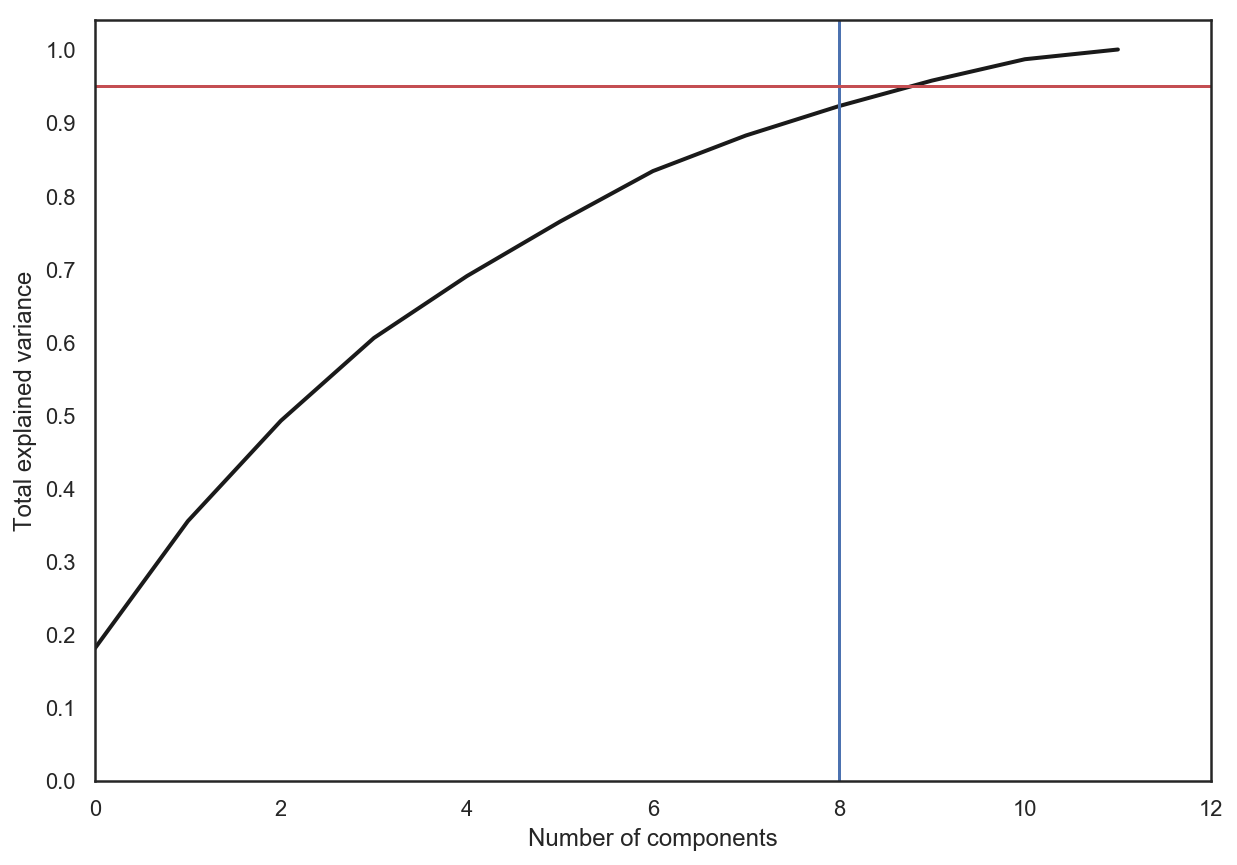

In [ ]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();


In [ ]:
# Fit your dataset to the optimal pca
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names)
X_names_sparse.shape


(57, 363)

In [ ]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse]))


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# kNN first
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.3s finished
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'n_neighbors': 8}, 0.19298245614035087)

In [ ]:
# Random Forests second
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42,
                             n_jobs=-1, oob_score=True)
forest_grid = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
forest_grid.fit(X_train_last, y_train)
forest_grid.best_estimator_, forest_grid.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=5, max_features=8, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=True, random_state=42, verbose=0, warm_start=False),
 0.2631578947368421)

In [ ]:
# Decision Trees third
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_


Fitting 5 folds for each of 150 candidates, totalling 750 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    0.4s finished
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
             max_features=13, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 0.2807017543859649)

In [ ]:
playlist_df

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
Under The Jasmine,3dyjALPqrvKXGQzqIxViFs,0.7610,0.523,268813,0.3080,0.000000,2,0.1450,-8.703,0,0.0339,161.483,0.6380,4
Sogno l'amore,0NCpmV4pGSFtTZLul3QUbj,0.7500,0.350,525926,0.5160,0.422000,10,0.8670,-9.429,0,0.0481,140.205,0.1300,2
Mia Istoria,33ltS0rtkqfMjUWcWg9yy2,0.5950,0.291,199773,0.6090,0.002480,9,0.1180,-13.699,0,0.0446,69.496,0.5310,1
California Dreamin',41uHv2ZIT0YDUHoyNzvRQ1,0.7640,0.772,188346,0.4090,0.003230,9,0.1010,-9.226,0,0.0299,109.978,0.3380,5
Little Drop Of Poison,105zKOcevVlvQmZPSZX1jv,0.6420,0.611,188155,0.3270,0.000043,9,0.1150,-11.122,0,0.0572,114.990,0.5510,6
Blue Eyes Unchanged,4rw8KX7KuZDdeMH4O1ey9s,0.3060,0.794,306794,0.2710,0.894000,4,0.0946,-15.577,0,0.2670,124.009,0.2850,1
Petite fleur,0oMp06EjwhYFvDB33VCiW3,0.8600,0.616,163187,0.2140,0.000164,9,0.0945,-9.634,0,0.0329,114.990,0.4470,3
Waltz to Paris,02q3kEgng0D3vL2Y8ONVRw,0.8170,0.396,219827,0.2570,0.004170,10,0.1010,-12.679,0,0.0353,170.530,0.4440,4
Irene,7IaWt6uVIfpiqdMwq8iEL1,0.9760,0.549,197920,0.1170,0.648000,6,0.1040,-16.669,0,0.0521,175.574,0.3090,4
House Of Pain,3rGmuSfsTTl0nNFpk2N595,0.7530,0.385,270427,0.2610,0.000223,9,0.1160,-11.734,0,0.0282,137.683,0.2270,2


In [ ]:
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/
c1, c2, c3 = 0, 0, 0
rec_tracks = []
for i in playlist_df['id'].values.tolist():
    c1+=1
    print("sürüyor f1",c1)
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/2))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    c2+=1
    print("sürüyor f2",c2)
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        c3+=1
        print("sürüyor f3",c3)
        rec_features.append(track)

rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)

sürüyor f1 1
sürüyor f1 2
sürüyor f1 3
sürüyor f1 4
sürüyor f1 5
sürüyor f1 6
sürüyor f1 7
sürüyor f1 8
sürüyor f1 9
sürüyor f1 10
sürüyor f1 11
sürüyor f1 12
sürüyor f1 13
sürüyor f1 14
sürüyor f1 15
sürüyor f1 16
sürüyor f1 17
sürüyor f1 18
sürüyor f1 19
sürüyor f1 20
sürüyor f1 21
sürüyor f1 22
sürüyor f1 23
sürüyor f1 24
sürüyor f1 25
sürüyor f1 26
sürüyor f1 27
sürüyor f1 28
sürüyor f1 29
sürüyor f1 30
sürüyor f1 31
sürüyor f1 32
sürüyor f1 33
sürüyor f1 34
sürüyor f1 35
sürüyor f1 36
sürüyor f1 37
sürüyor f1 38
sürüyor f1 39
sürüyor f1 40
sürüyor f1 41
sürüyor f1 42
sürüyor f1 43
sürüyor f1 44
sürüyor f1 45
sürüyor f1 46
sürüyor f1 47
sürüyor f1 48
sürüyor f1 49
sürüyor f1 50
sürüyor f1 51
sürüyor f1 52
sürüyor f1 53
sürüyor f1 54
sürüyor f1 55
sürüyor f1 56
sürüyor f1 57
sürüyor f2 1
sürüyor f2 2
sürüyor f2 3
sürüyor f2 4
sürüyor f2 5
sürüyor f2 6
sürüyor f2 7
sürüyor f2 8
sürüyor f2 9
sürüyor f2 10
sürüyor f2 11
sürüyor f2 12
sürüyor f2 13
sürüyor f2 14
sürüyor f2 15
sürüyor f2

sürüyor f2 1075
sürüyor f2 1076
sürüyor f2 1077
sürüyor f2 1078
sürüyor f2 1079
sürüyor f2 1080
sürüyor f2 1081
sürüyor f2 1082
sürüyor f2 1083
sürüyor f2 1084
sürüyor f2 1085
sürüyor f2 1086
sürüyor f2 1087
sürüyor f2 1088
sürüyor f2 1089
sürüyor f2 1090
sürüyor f2 1091
sürüyor f2 1092
sürüyor f2 1093
sürüyor f2 1094
sürüyor f2 1095
sürüyor f2 1096
sürüyor f2 1097
sürüyor f2 1098
sürüyor f2 1099
sürüyor f2 1100
sürüyor f2 1101
sürüyor f2 1102
sürüyor f2 1103
sürüyor f2 1104
sürüyor f2 1105
sürüyor f2 1106
sürüyor f2 1107
sürüyor f2 1108
sürüyor f2 1109
sürüyor f2 1110
sürüyor f2 1111
sürüyor f2 1112
sürüyor f2 1113
sürüyor f2 1114
sürüyor f2 1115
sürüyor f2 1116
sürüyor f2 1117
sürüyor f2 1118
sürüyor f2 1119
sürüyor f2 1120
sürüyor f2 1121
sürüyor f2 1122
sürüyor f2 1123
sürüyor f2 1124
sürüyor f2 1125
sürüyor f2 1126
sürüyor f2 1127
sürüyor f2 1128
sürüyor f2 1129
sürüyor f2 1130
sürüyor f2 1131
sürüyor f2 1132
sürüyor f2 1133
sürüyor f2 1134
sürüyor f2 1135
sürüyor f2 1136
sürüyor 

sürüyor f3 1
sürüyor f3 2
sürüyor f3 3
sürüyor f3 4
sürüyor f3 5
sürüyor f3 6
sürüyor f3 7
sürüyor f3 8
sürüyor f3 9
sürüyor f3 10
sürüyor f3 11
sürüyor f3 12
sürüyor f3 13
sürüyor f3 14
sürüyor f3 15
sürüyor f3 16
sürüyor f3 17
sürüyor f3 18
sürüyor f3 19
sürüyor f3 20
sürüyor f3 21
sürüyor f3 22
sürüyor f3 23
sürüyor f3 24
sürüyor f3 25
sürüyor f3 26
sürüyor f3 27
sürüyor f3 28
sürüyor f3 29
sürüyor f3 30
sürüyor f3 31
sürüyor f3 32
sürüyor f3 33
sürüyor f3 34
sürüyor f3 35
sürüyor f3 36
sürüyor f3 37
sürüyor f3 38
sürüyor f3 39
sürüyor f3 40
sürüyor f3 41
sürüyor f3 42
sürüyor f3 43
sürüyor f3 44
sürüyor f3 45
sürüyor f3 46
sürüyor f3 47
sürüyor f3 48
sürüyor f3 49
sürüyor f3 50
sürüyor f3 51
sürüyor f3 52
sürüyor f3 53
sürüyor f3 54
sürüyor f3 55
sürüyor f3 56
sürüyor f3 57
sürüyor f3 58
sürüyor f3 59
sürüyor f3 60
sürüyor f3 61
sürüyor f3 62
sürüyor f3 63
sürüyor f3 64
sürüyor f3 65
sürüyor f3 66
sürüyor f3 67
sürüyor f3 68
sürüyor f3 69
sürüyor f3 70
sürüyor f3 71
sürüyor f3 72
s

sürüyor f3 555
sürüyor f3 556
sürüyor f3 557
sürüyor f3 558
sürüyor f3 559
sürüyor f3 560
sürüyor f3 561
sürüyor f3 562
sürüyor f3 563
sürüyor f3 564
sürüyor f3 565
sürüyor f3 566
sürüyor f3 567
sürüyor f3 568
sürüyor f3 569
sürüyor f3 570
sürüyor f3 571
sürüyor f3 572
sürüyor f3 573
sürüyor f3 574
sürüyor f3 575
sürüyor f3 576
sürüyor f3 577
sürüyor f3 578
sürüyor f3 579
sürüyor f3 580
sürüyor f3 581
sürüyor f3 582
sürüyor f3 583
sürüyor f3 584
sürüyor f3 585
sürüyor f3 586
sürüyor f3 587
sürüyor f3 588
sürüyor f3 589
sürüyor f3 590
sürüyor f3 591
sürüyor f3 592
sürüyor f3 593
sürüyor f3 594
sürüyor f3 595
sürüyor f3 596
sürüyor f3 597
sürüyor f3 598
sürüyor f3 599
sürüyor f3 600
sürüyor f3 601
sürüyor f3 602
sürüyor f3 603
sürüyor f3 604
sürüyor f3 605
sürüyor f3 606
sürüyor f3 607
sürüyor f3 608
sürüyor f3 609
sürüyor f3 610
sürüyor f3 611
sürüyor f3 612
sürüyor f3 613
sürüyor f3 614
sürüyor f3 615
sürüyor f3 616
sürüyor f3 617
sürüyor f3 618
sürüyor f3 619
sürüyor f3 620
sürüyor f3

sürüyor f3 1095
sürüyor f3 1096
sürüyor f3 1097
sürüyor f3 1098
sürüyor f3 1099
sürüyor f3 1100
sürüyor f3 1101
sürüyor f3 1102
sürüyor f3 1103
sürüyor f3 1104
sürüyor f3 1105
sürüyor f3 1106
sürüyor f3 1107
sürüyor f3 1108
sürüyor f3 1109
sürüyor f3 1110
sürüyor f3 1111
sürüyor f3 1112
sürüyor f3 1113
sürüyor f3 1114
sürüyor f3 1115
sürüyor f3 1116
sürüyor f3 1117
sürüyor f3 1118
sürüyor f3 1119
sürüyor f3 1120
sürüyor f3 1121
sürüyor f3 1122
sürüyor f3 1123
sürüyor f3 1124
sürüyor f3 1125
sürüyor f3 1126
sürüyor f3 1127
sürüyor f3 1128
sürüyor f3 1129
sürüyor f3 1130
sürüyor f3 1131
sürüyor f3 1132
sürüyor f3 1133
sürüyor f3 1134
sürüyor f3 1135
sürüyor f3 1136
sürüyor f3 1137
sürüyor f3 1138
sürüyor f3 1139
sürüyor f3 1140
sürüyor f3 1141
sürüyor f3 1142
sürüyor f3 1143
sürüyor f3 1144
sürüyor f3 1145
sürüyor f3 1146
sürüyor f3 1147
sürüyor f3 1148
sürüyor f3 1149
sürüyor f3 1150
sürüyor f3 1151
sürüyor f3 1152
sürüyor f3 1153
sürüyor f3 1154
sürüyor f3 1155
sürüyor f3 1156
sürüyor 

In [ ]:
rec_playlist_df = rec_playlist_df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]
yedek = rec_playlist_df

In [ ]:
rec_playlist_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
5CG349EjOLsKraA4SsTSbi,0.775000,0.692,238415,0.5130,0.842000,4,0.4090,-10.972,0,0.0345,124.942,0.0648
4LxVerLMs9bpGitbEDyRFA,0.994000,0.259,190000,0.2160,0.938000,6,0.1210,-18.769,1,0.0684,180.123,0.0356
1PUp59n1BKxKH7g4AXIGoE,0.335000,0.662,219160,0.7040,0.026300,5,0.1360,-7.084,0,0.0307,152.020,0.3240
6uJREg38Kh42NdHswq67VH,0.842000,0.433,268427,0.2550,0.000793,10,0.1140,-10.317,0,0.0310,121.452,0.2270
3ApUMA1VWEvuKMZif4EZlK,0.844000,0.402,222787,0.3140,0.000001,9,0.1420,-10.560,0,0.0329,97.979,0.4160
2z8cogITSlQnc56ZED49pn,0.466000,0.726,262407,0.5760,0.000061,8,0.0991,-6.796,0,0.0357,82.439,0.4420
53SdOktzh7M31BLA2KqheT,0.728000,0.534,262967,0.5270,0.001090,5,0.1160,-6.609,1,0.0590,114.217,0.4620
11QJy1kXu8yzmAXrKcxtU4,0.374000,0.570,233627,0.5490,0.258000,1,0.1160,-7.845,0,0.0257,139.996,0.5230
5gW8CwStSOep4f7LvMrf8S,0.242000,0.571,252733,0.5230,0.021100,9,0.2920,-9.051,0,0.0272,92.002,0.4180
0zpQOcfbdOUu7uEl5SpHS9,0.202000,0.496,248747,0.7030,0.027200,1,0.1430,-6.834,0,0.0304,96.971,0.3350


In [ ]:
# Make predictions
tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
X_test_pca = pca.transform(rec_playlist_df_scaled)
X_test_names = v.transform(rec_track_names)
X_test_last = csr_matrix(hstack([X_test_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
rec_playlist_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
5CG349EjOLsKraA4SsTSbi,0.775000,0.692,238415,0.5130,0.842000,4,0.4090,-10.972,0,0.0345,124.942,0.0648
4LxVerLMs9bpGitbEDyRFA,0.994000,0.259,190000,0.2160,0.938000,6,0.1210,-18.769,1,0.0684,180.123,0.0356
1PUp59n1BKxKH7g4AXIGoE,0.335000,0.662,219160,0.7040,0.026300,5,0.1360,-7.084,0,0.0307,152.020,0.3240
6uJREg38Kh42NdHswq67VH,0.842000,0.433,268427,0.2550,0.000793,10,0.1140,-10.317,0,0.0310,121.452,0.2270
3ApUMA1VWEvuKMZif4EZlK,0.844000,0.402,222787,0.3140,0.000001,9,0.1420,-10.560,0,0.0329,97.979,0.4160
2z8cogITSlQnc56ZED49pn,0.466000,0.726,262407,0.5760,0.000061,8,0.0991,-6.796,0,0.0357,82.439,0.4420
53SdOktzh7M31BLA2KqheT,0.728000,0.534,262967,0.5270,0.001090,5,0.1160,-6.609,1,0.0590,114.217,0.4620
11QJy1kXu8yzmAXrKcxtU4,0.374000,0.570,233627,0.5490,0.258000,1,0.1160,-7.845,0,0.0257,139.996,0.5230
5gW8CwStSOep4f7LvMrf8S,0.242000,0.571,252733,0.5230,0.021100,9,0.2920,-9.051,0,0.0272,92.002,0.4180
0zpQOcfbdOUu7uEl5SpHS9,0.202000,0.496,248747,0.7030,0.027200,1,0.1430,-6.834,0,0.0304,96.971,0.3350


In [ ]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist; 9 or 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=10]['index'].values.tolist()


ValueError: cannot insert level_0, already exists

In [ ]:
rec_playlist_df

,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
0,5CG349EjOLsKraA4SsTSbi,0.7750,0.692,238415,0.5130,0.842000,4,0.4090,-10.972,0,0.0345,124.942,0.0648,10
1,5l9c6bJmzvftumhz4TMPgk,0.5260,0.648,303213,0.3090,0.000249,2,0.1240,-12.432,1,0.0264,112.929,0.4070,10
2,54TbgZjTIl5ACMgBblalDk,0.8610,0.446,345347,0.4030,0.011600,9,0.1060,-7.147,0,0.0331,113.859,0.1500,10
3,2GanylJ8C1TuwEXyHcxIzR,0.9390,0.280,138160,0.1100,0.816000,2,0.1450,-22.821,1,0.0528,83.362,0.3080,10
4,6I7Akiq3g1eu4XbHT7kKmy,0.8790,0.309,210333,0.1250,0.957000,0,0.1420,-14.125,0,0.0352,72.732,0.0351,10
5,7GOPGrhIuPlc93284ctzP3,0.5670,0.277,323173,0.0279,0.000665,2,0.5050,-17.277,1,0.0516,76.368,0.0371,10
6,1eqENjZS8hTmOJWRUb3yp2,0.9530,0.526,117427,0.0896,0.000000,0,0.3720,-16.696,1,0.0317,64.340,0.3740,10
7,421Gp1eSmOIcD6alTWowFR,0.9630,0.800,505147,0.0240,0.207000,0,0.1010,-20.703,0,0.0524,148.570,0.3090,10
8,0q4k9xVfRMT24nWZtZfk09,0.9820,0.552,254680,0.1160,0.071100,9,0.1110,-14.489,1,0.0480,65.193,0.1370,10
9,53fb9BE9v0ZdjwRb8WfipJ,0.7360,0.646,258410,0.3910,0.585000,7,0.1240,-10.369,0,0.0292,127.978,0.2010,10


In [ ]:
# Create a new playlist for tracks to add
playlist_recs = sp.user_playlist_create(username, name='CANK')
#name='PCA + tf-idf + DT - Recommended Songs for Playlist - {}'.format(sourcePlaylist['name']))


In [ ]:
playlist_recs

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/5HUAXGQVhCiHUhdFoj1nxO'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/5HUAXGQVhCiHUhdFoj1nxO',
 'id': '5HUAXGQVhCiHUhdFoj1nxO',
 'images': [],
 'name': 'CANK',
 'owner': {'display_name': 'cankurttekin',
  'external_urls': {'spotify': 'https://open.spotify.com/user/cankurttekin'},
  'href': 'https://api.spotify.com/v1/users/cankurttekin',
  'id': 'cankurttekin',
  'type': 'user',
  'uri': 'spotify:user:cankurttekin'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSw3MWI0ZDNmZGU5NTc1M2VjMzJlYjZhYjYzMDFjZjUxMDZkMGZlNDEw',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/5HUAXGQVhCiHUhdFoj1nxO/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:5HUAXGQVhCiHUhdFoj1nxO'}

In [ ]:
print(len(recs_to_add))

544


In [ ]:
arr1 = np.array_split(recs_to_add, 6)
len(arr1[0])

93

In [ ]:
# Add tracks to the new playlist
#for i in range(1):
sp.user_playlist_add_tracks(username, playlist_recs['id'], arr1[6]);


IndexError: list index out of range

In [ ]:
count=0
for i in range(len(recs_to_add)):
    count+=1
    recs_to_add[i]

print(count)

170


In [ ]:
len(arr1[5])


29

In [ ]:
len(arr1[1])

54